<h1>Load Libraries </hq>

In [892]:
import numpy as np
import pandas as pd


<h1>Data Loading</h1>

In [893]:
dataset = "Titanic-Dataset.csv"
df = pd.read_csv(dataset)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [894]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h1> Data Preproccessing </h1>

<h1>Handle Missing Values </h1>

In [895]:
# Age imputation using median by passenger class
df['Age'] = df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'))

# Embarked imputation using mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [896]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [897]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [898]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h1># Detect fare outliers using IQR </h1>

In [899]:
print("Dataset shape before outlier removal:", df.shape)
# Detect fare outliers using IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Fare'] < Q1 - 1.5*IQR) | (df['Fare'] > Q3 + 1.5*IQR)]
# Summary statistics of outliers
print("Outliers detected:", outliers.shape[0])

# Define bounds to remove outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#  Remove outliers
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

print("Dataset shape after outlier removal:", df.shape)


Dataset shape before outlier removal: (891, 12)
Outliers detected: 116
Dataset shape after outlier removal: (775, 12)


<h1>Duplicate Removal </h1>

In [900]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicates (keep first occurrence)
df = df.drop_duplicates()

# Verify removal
print("Number of duplicate rows after removal:", df.duplicated().sum())


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


<h1>Data type correction </h1>

In [901]:
# Print data types before changes
print("Before changes:\n", df[['Pclass', 'Sex']].dtypes, "\n")

# Convert categorical variables to appropriate types
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')

# Print data types after changes
print("After changes:\n", df[['Pclass', 'Sex']].dtypes)


Before changes:
 Pclass     int64
Sex       object
dtype: object 

After changes:
 Pclass    category
Sex       category
dtype: object


<h1> Data Min-Max Normalization/Scaling / Transformation</h1>

In [902]:
from sklearn.preprocessing import MinMaxScaler

#  Print before normalization
print("Before normalization:")
print(df[['Age', 'Fare']].head(), "\n")

#   Apply Min-Max Scaling
scaler = MinMaxScaler()
df['Age_normalized'] = scaler.fit_transform(df[['Age']])
df['Fare_normalized'] = scaler.fit_transform(df[['Fare']])

#  Print after normalization
print("After normalization:")
print(df[['Age', 'Age_normalized', 'Fare', 'Fare_normalized']].head())


Before normalization:
    Age     Fare
0  22.0   7.2500
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500
5  24.0   8.4583 

After normalization:
    Age  Age_normalized     Fare  Fare_normalized
0  22.0        0.271174   7.2500         0.111538
2  26.0        0.321438   7.9250         0.121923
3  35.0        0.434531  53.1000         0.816923
4  35.0        0.434531   8.0500         0.123846
5  24.0        0.296306   8.4583         0.130128


<h1>Z-SCORE Standardization </h1>

In [903]:
from sklearn.preprocessing import StandardScaler

#  Print before standardization
print("Before standardization:")
print(df[['Age']].head(), "\n")

#  Apply Standard Scaling
scaler = StandardScaler()
df['Age_standardized'] = scaler.fit_transform(df[['Age']])

#  Print after standardization
print("After standardization:")
print(df[['Age', 'Age_standardized']].head())


Before standardization:
    Age
0  22.0
2  26.0
3  35.0
4  35.0
5  24.0 

After standardization:
    Age  Age_standardized
0  22.0         -0.489261
2  26.0         -0.181190
3  35.0          0.511969
4  35.0          0.511969
5  24.0         -0.335226


<h1>One Hot Encodding </h1>

In [904]:
# Titanic example
embarked_dummies =pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df.drop('Embarked', axis=1), embarked_dummies], axis=1)

# Creates: Embarked_C, Embarked_Q, Embarked_S columns
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_normalized,Fare_normalized,Age_standardized,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.271174,0.111538,-0.489261,False,False,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.321438,0.121923,-0.181190,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.434531,0.816923,0.511969,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.434531,0.123846,0.511969,False,False,True
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,0.296306,0.130128,-0.335226,False,True,False


<h1>Label EWncoding</h1>

In [905]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])
# male=1, female=0
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_normalized,Fare_normalized,Age_standardized,Embarked_C,Embarked_Q,Embarked_S,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.271174,0.111538,-0.489261,False,False,True,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.321438,0.121923,-0.181190,False,False,True,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.434531,0.816923,0.511969,False,False,True,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.434531,0.123846,0.511969,False,False,True,1
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,0.296306,0.130128,-0.335226,False,True,False,1


<h1>Original Data before adding any new feature</h1>

In [906]:
# Target variable
y = df['Survived']

# Original features (before adding engineered features like FamilySize, IsAlone, Title, etc.)
X_original = df[['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare',
                 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# Verify
print(X_original.head())

  Pclass  Sex_encoded   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0      3            1  22.0      1      0   7.2500       False       False   
2      3            0  26.0      0      0   7.9250       False       False   
3      1            0  35.0      1      0  53.1000       False       False   
4      3            1  35.0      0      0   8.0500       False       False   
5      3            1  24.0      0      0   8.4583       False        True   

   Embarked_S  
0        True  
2        True  
3        True  
4        True  
5       False  


<h1>Ordinal Encoding:</h1>

In [907]:
# For ordered categories like Pclass
class_mapping = {1: 'First', 2: 'Second', 3: 'Third'}
df['Pclass_ordinal'] = df['Pclass'].map(class_mapping)

<h1>CREATING NEW FEATURE </hq>

In [908]:
# Family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Is alone feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Title extraction from name
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_normalized,Age_standardized,Embarked_C,Embarked_Q,Embarked_S,Sex_encoded,Pclass_ordinal,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0.111538,-0.489261,False,False,True,1,Third,2,0,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.121923,-0.181190,False,False,True,0,Third,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0.816923,0.511969,False,False,True,0,First,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0.123846,0.511969,False,False,True,1,Third,1,1,Mr
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,...,0.130128,-0.335226,False,True,False,1,Third,1,1,Mr


<h1>Binning/Discretization: </h1>

In [909]:
# Age binning for Titanic
df['AgeGroup'] = pd.cut(df['Age'], 
                            bins=[0, 12, 18, 35, 60, 100], 
                            labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_standardized,Embarked_C,Embarked_Q,Embarked_S,Sex_encoded,Pclass_ordinal,FamilySize,IsAlone,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,-0.489261,False,False,True,1,Third,2,0,Mr,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,-0.181190,False,False,True,0,Third,1,1,Miss,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0.511969,False,False,True,0,First,2,0,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0.511969,False,False,True,1,Third,1,1,Mr,Adult
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,...,-0.335226,False,True,False,1,Third,1,1,Mr,Adult


<h1> INTERACTION Features

In [910]:
# Interaction between Sex and Pclass
df['Sex_Pclass'] = df['Sex'].astype(str) + '_' + df['Pclass'].astype(str)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_C,Embarked_Q,Embarked_S,Sex_encoded,Pclass_ordinal,FamilySize,IsAlone,Title,AgeGroup,Sex_Pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,False,False,True,1,Third,2,0,Mr,Adult,male_3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,False,False,True,0,Third,1,1,Miss,Adult,female_3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,False,False,True,0,First,2,0,Mrs,Adult,female_1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,False,False,True,1,Third,1,1,Mr,Adult,male_3
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,...,False,True,False,1,Third,1,1,Mr,Adult,male_3


In [911]:
df.isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               661
Age_normalized        0
Fare_normalized       0
Age_standardized      0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
Sex_encoded           0
Pclass_ordinal        0
FamilySize            0
IsAlone               0
Title                 0
AgeGroup              0
Sex_Pclass            0
dtype: int64

In [912]:
df = df.drop(columns=['Ticket', 'Cabin'])

<h1>Steps of Feature Engineering</h1>

<h1>EDA</h1>

In [913]:
# Explore the data structure
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Analyze target variable
print(df['Survived'].value_counts())

# Explore relationships
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(survival_by_sex)  # Shows females had ~68% survival rate vs males ~17%

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       775 non-null    int64   
 1   Survived          775 non-null    int64   
 2   Pclass            775 non-null    category
 3   Name              775 non-null    object  
 4   Sex               775 non-null    category
 5   Age               775 non-null    float64 
 6   SibSp             775 non-null    int64   
 7   Parch             775 non-null    int64   
 8   Fare              775 non-null    float64 
 9   Age_normalized    775 non-null    float64 
 10  Fare_normalized   775 non-null    float64 
 11  Age_standardized  775 non-null    float64 
 12  Embarked_C        775 non-null    bool    
 13  Embarked_Q        775 non-null    bool    
 14  Embarked_S        775 non-null    bool    
 15  Sex_encoded       775 non-null    int64   
 16  Pclass_ordinal    775 non-null 

C:\Users\user\AppData\Local\Temp\ipykernel_10848\3035563360.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_sex = df.groupby('Sex')['Survived'].mean()


<h1>Family Size Engineering </h1>

In [914]:
# Create family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create categorical family size
def categorize_family_size(size):
    if size == 1:
        return 'Alone'
    elif size <= 4:
        return 'Small'
    else:
        return 'Large'

df['FamilySizeCategory'] = df['FamilySize'].apply(categorize_family_size)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Age_normalized,...,Embarked_Q,Embarked_S,Sex_encoded,Pclass_ordinal,FamilySize,IsAlone,Title,AgeGroup,Sex_Pclass,FamilySizeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0.271174,...,False,True,1,Third,2,0,Mr,Adult,male_3,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0.321438,...,False,True,0,Third,1,1,Miss,Adult,female_3,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0.434531,...,False,True,0,First,2,0,Mrs,Adult,female_1,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0.434531,...,False,True,1,Third,1,1,Mr,Adult,male_3,Alone
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,8.4583,0.296306,...,True,False,1,Third,1,1,Mr,Adult,male_3,Alone


<h1>Title Extractions </h1>

In [915]:
# Extract titles from names
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Group rare titles
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Age_normalized,...,Embarked_Q,Embarked_S,Sex_encoded,Pclass_ordinal,FamilySize,IsAlone,Title,AgeGroup,Sex_Pclass,FamilySizeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0.271174,...,False,True,1,Third,2,0,Mr,Adult,male_3,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0.321438,...,False,True,0,Third,1,1,Miss,Adult,female_3,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0.434531,...,False,True,0,First,2,0,Mrs,Adult,female_1,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0.434531,...,False,True,1,Third,1,1,Mr,Adult,male_3,Alone
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,8.4583,0.296306,...,True,False,1,Third,1,1,Mr,Adult,male_3,Alone


<h1> Age Creation </h1>

In [916]:
# Create age groups
def categorize_age(age):
    if age <= 12:
        return 'Child'
    elif age <= 18:
        return 'Teen'
    elif age <= 35:
        return 'Adult'
    elif age <= 60:
        return 'Middle_Age'
    else:
        return 'Senior'

df['AgeGroup'] = df['Age'].apply(categorize_age)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Age_normalized,...,Embarked_Q,Embarked_S,Sex_encoded,Pclass_ordinal,FamilySize,IsAlone,Title,AgeGroup,Sex_Pclass,FamilySizeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0.271174,...,False,True,1,Third,2,0,Mr,Adult,male_3,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0.321438,...,False,True,0,Third,1,1,Miss,Adult,female_3,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0.434531,...,False,True,0,First,2,0,Mrs,Adult,female_1,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0.434531,...,False,True,1,Third,1,1,Mr,Adult,male_3,Alone
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,8.4583,0.296306,...,True,False,1,Third,1,1,Mr,Adult,male_3,Alone


<h1>Binning </h1>

In [917]:
# Create fare categories
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very_High'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Age_normalized,...,Embarked_S,Sex_encoded,Pclass_ordinal,FamilySize,IsAlone,Title,AgeGroup,Sex_Pclass,FamilySizeCategory,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0.271174,...,True,1,Third,2,0,Mr,Adult,male_3,Small,Low
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0.321438,...,True,0,Third,1,1,Miss,Adult,female_3,Alone,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0.434531,...,True,0,First,2,0,Mrs,Adult,female_1,Small,Very_High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0.434531,...,True,1,Third,1,1,Mr,Adult,male_3,Alone,Medium
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,8.4583,0.296306,...,False,1,Third,1,1,Mr,Adult,male_3,Alone,Medium


<h1>LOG TRANSFORMATION </h1>

In [918]:
# Log transformation for highly skewed fare
df['Fare_Log'] = np.log1p(df['Fare'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Age_normalized,...,Sex_encoded,Pclass_ordinal,FamilySize,IsAlone,Title,AgeGroup,Sex_Pclass,FamilySizeCategory,FareBin,Fare_Log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0.271174,...,1,Third,2,0,Mr,Adult,male_3,Small,Low,2.110213
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0.321438,...,0,Third,1,1,Miss,Adult,female_3,Alone,Medium,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0.434531,...,0,First,2,0,Mrs,Adult,female_1,Small,Very_High,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0.434531,...,1,Third,1,1,Mr,Adult,male_3,Alone,Medium,2.202765
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,8.4583,0.296306,...,1,Third,1,1,Mr,Adult,male_3,Alone,Medium,2.246893


<h1>Sex Encoding </h1>

In [919]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Encode 'Sex' column in X_engineered
df['Sex'] = le.fit_transform(df['Sex'])

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Age_normalized,...,Sex_encoded,Pclass_ordinal,FamilySize,IsAlone,Title,AgeGroup,Sex_Pclass,FamilySizeCategory,FareBin,Fare_Log
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.271174,...,1,Third,2,0,Mr,Adult,male_3,Small,Low,2.110213
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.321438,...,0,Third,1,1,Miss,Adult,female_3,Alone,Medium,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.434531,...,0,First,2,0,Mrs,Adult,female_1,Small,Very_High,3.990834
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.434531,...,1,Third,1,1,Mr,Adult,male_3,Alone,Medium,2.202765
5,6,0,3,"Moran, Mr. James",1,24.0,0,0,8.4583,0.296306,...,1,Third,1,1,Mr,Adult,male_3,Alone,Medium,2.246893


<h1> Correlation Analysis </h1>

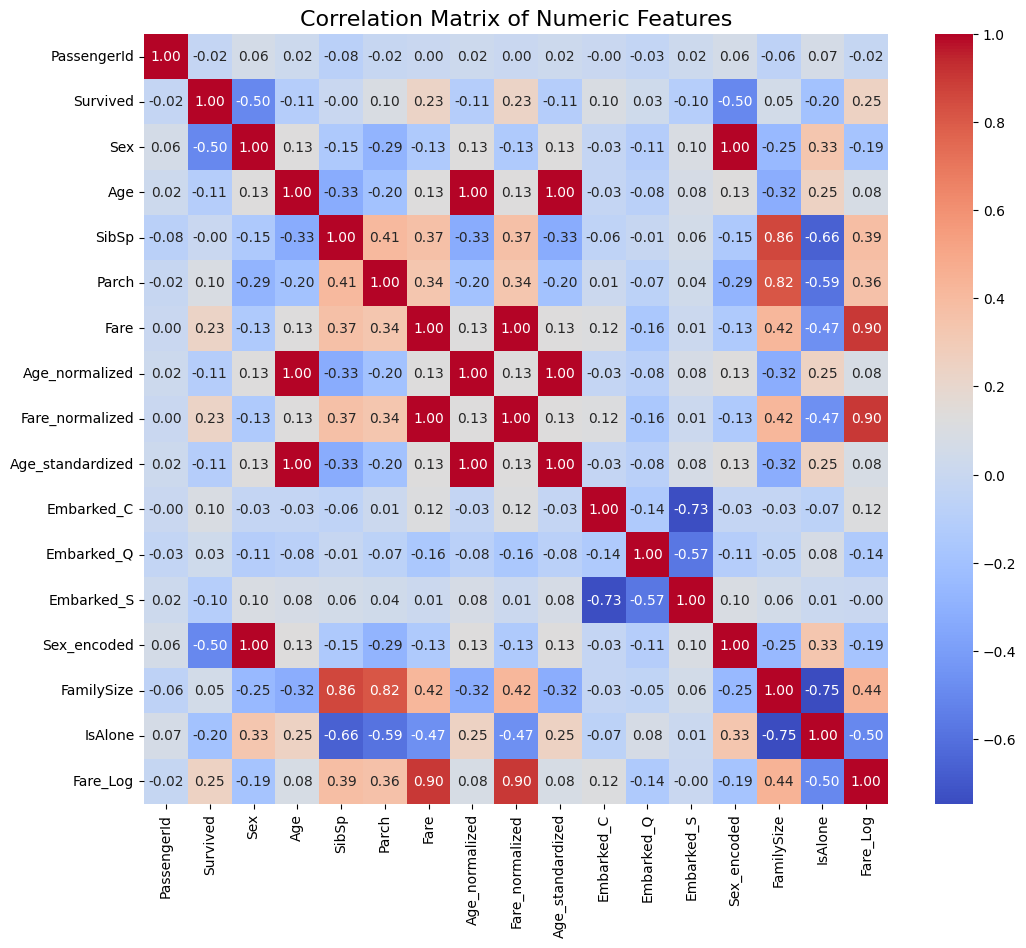

In [920]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = df.select_dtypes(include=['int64', 'float64', 'bool'])
correlation_matrix = numeric_df.corr()
high_corr_features = correlation_matrix[abs(correlation_matrix['Survived']) > 0.1]['Survived'].index
# correlation_matrix
# Set figure size
plt.figure(figsize=(12, 10))
# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Title
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()


In [921]:
correlation_matrix

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Age_normalized,Fare_normalized,Age_standardized,Embarked_C,Embarked_Q,Embarked_S,Sex_encoded,FamilySize,IsAlone,Fare_Log
PassengerId,1.000000,-0.024438,0.058468,0.020309,-0.080426,-0.015117,0.002942,0.020309,0.002942,0.020309,-0.000495,-0.032176,0.022484,0.058468,-0.059463,0.066565,-0.017831
Survived,-0.024438,1.000000,-0.499888,-0.106826,-0.003156,0.098575,0.234422,-0.106826,0.234422,-0.106826,0.096513,0.032707,-0.102337,-0.499888,0.052674,-0.198104,0.247415
Sex,0.058468,-0.499888,1.000000,0.132025,-0.146035,-0.289637,-0.134106,0.132025,-0.134106,0.132025,-0.027090,-0.107002,0.095835,1.000000,-0.253402,0.333910,-0.187440
Age,0.020309,-0.106826,0.132025,1.000000,-0.329546,-0.195110,0.128011,1.000000,0.128011,1.000000,-0.025343,-0.079308,0.075390,0.132025,-0.317515,0.248750,0.081395
SibSp,-0.080426,-0.003156,-0.146035,-0.329546,1.000000,0.410182,0.370388,-0.329546,0.370388,-0.329546,-0.055265,-0.013621,0.055095,-0.146035,0.862608,-0.661475,0.385515
Parch,-0.015117,0.098575,-0.289637,-0.195110,0.410182,1.000000,0.336844,-0.195110,0.336844,-0.195110,0.011444,-0.069729,0.038364,-0.289637,0.815184,-0.589803,0.360430
Fare,0.002942,0.234422,-0.134106,0.128011,0.370388,0.336844,1.000000,0.128011,1.000000,0.128011,0.117309,-0.159017,0.011980,-0.134106,0.422070,-0.465614,0.898358
Age_normalized,0.020309,-0.106826,0.132025,1.000000,-0.329546,-0.195110,0.128011,1.000000,0.128011,1.000000,-0.025343,-0.079308,0.075390,0.132025,-0.317515,0.248750,0.081395
Fare_normalized,0.002942,0.234422,-0.134106,0.128011,0.370388,0.336844,1.000000,0.128011,1.000000,0.128011,0.117309,-0.159017,0.011980,-0.134106,0.422070,-0.465614,0.898358
Age_standardized,0.020309,-0.106826,0.132025,1.000000,-0.329546,-0.195110,0.128011,1.000000,0.128011,1.000000,-0.025343,-0.079308,0.075390,0.132025,-0.317515,0.248750,0.081395


<h1>Statistical Tests: (P-VALUE less than 0.05 means correct(significant))</h1>

In [922]:
from scipy.stats import chi2_contingency

# Chi-square test for categorical features
def chi_square_test(feature):
    contingency_table = pd.crosstab(df[feature], df['Survived'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    return p_value < 0.05  # Significant if p < 0.05

# List of categorical features to test
categorical_features = ['PassengerId', 'Survived','Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Age_normalized', 'Fare_normalized',
       'Age_standardized', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Sex_encoded', 'Pclass_ordinal', 'FamilySize', 'IsAlone', 'Title',
       'AgeGroup', 'Sex_Pclass', 'FamilySizeCategory', 'FareBin', 'Fare_Log']

# Perform Chi-square test and display results
for feature in categorical_features:
    is_significant = chi_square_test(feature)
    print(f"{feature}: {'Significant (p < 0.05)' if is_significant else 'Not significant (p >= 0.05)'}")


PassengerId: Not significant (p >= 0.05)
Survived: Significant (p < 0.05)
Pclass: Significant (p < 0.05)
Name: Not significant (p >= 0.05)
Sex: Significant (p < 0.05)
Age: Not significant (p >= 0.05)
SibSp: Significant (p < 0.05)
Parch: Significant (p < 0.05)
Fare: Significant (p < 0.05)
Age_normalized: Not significant (p >= 0.05)
Fare_normalized: Significant (p < 0.05)
Age_standardized: Not significant (p >= 0.05)
Embarked_C: Significant (p < 0.05)
Embarked_Q: Not significant (p >= 0.05)
Embarked_S: Significant (p < 0.05)
Sex_encoded: Significant (p < 0.05)
Pclass_ordinal: Significant (p < 0.05)
FamilySize: Significant (p < 0.05)
IsAlone: Significant (p < 0.05)
Title: Significant (p < 0.05)
AgeGroup: Significant (p < 0.05)
Sex_Pclass: Significant (p < 0.05)
FamilySizeCategory: Significant (p < 0.05)
FareBin: Significant (p < 0.05)
Fare_Log: Significant (p < 0.05)


In [923]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Age_normalized', 'Fare_normalized',
       'Age_standardized', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Sex_encoded', 'Pclass_ordinal', 'FamilySize', 'IsAlone', 'Title',
       'AgeGroup', 'Sex_Pclass', 'FamilySizeCategory', 'FareBin', 'Fare_Log'],
      dtype='object')

<h1>Drop non-significant Features after p-value testing. all >=0.05 should be dropped</h1>

In [924]:
# List of non-significant features to drop
features_to_drop = ['PassengerId', 'Name', 'Age_normalized', 'Age_standardized', 'Embarked_Q']

# Drop the columns
df = df.drop(columns=features_to_drop)

# Verify the remaining columns
print(df.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Fare_normalized', 'Embarked_C', 'Embarked_S', 'Sex_encoded',
       'Pclass_ordinal', 'FamilySize', 'IsAlone', 'Title', 'AgeGroup',
       'Sex_Pclass', 'FamilySizeCategory', 'FareBin', 'Fare_Log'],
      dtype='object')


<h1>DATA SPLITTING</h1>

In [925]:
X_engineered = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [926]:
X_engineered.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Fare_normalized',
       'Embarked_C', 'Embarked_S', 'Sex_encoded', 'Pclass_ordinal',
       'FamilySize', 'IsAlone', 'Title', 'AgeGroup', 'Sex_Pclass',
       'FamilySizeCategory', 'FareBin', 'Fare_Log'],
      dtype='object')

In [927]:
X_engineered.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Fare_normalized,Embarked_C,Embarked_S,Sex_encoded,Pclass_ordinal,FamilySize,IsAlone,Title,AgeGroup,Sex_Pclass,FamilySizeCategory,FareBin,Fare_Log
0,3,1,22.0,1,0,7.2500,0.111538,False,True,1,Third,2,0,Mr,Adult,male_3,Small,Low,2.110213
2,3,0,26.0,0,0,7.9250,0.121923,False,True,0,Third,1,1,Miss,Adult,female_3,Alone,Medium,2.188856
3,1,0,35.0,1,0,53.1000,0.816923,False,True,0,First,2,0,Mrs,Adult,female_1,Small,Very_High,3.990834
4,3,1,35.0,0,0,8.0500,0.123846,False,True,1,Third,1,1,Mr,Adult,male_3,Alone,Medium,2.202765
5,3,1,24.0,0,0,8.4583,0.130128,False,False,1,Third,1,1,Mr,Adult,male_3,Alone,Medium,2.246893


<h1>Feature Validation using cross-validation </h1>

In [928]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Target variable
y = df['Survived']

# Copy of X_engineered
X_engineered = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
                   'Fare_normalized','Embarked_C', 'Embarked_S',
                   'Sex_encoded', 'Pclass_ordinal', 'FamilySize', 'IsAlone',
                   'Title', 'AgeGroup', 'Sex_Pclass',
                   'FamilySizeCategory', 'FareBin', 'Fare_Log']].copy()

# Encode 'Sex' using LabelEncoder (if not already encoded)
le = LabelEncoder()
X_engineered['Sex_encoded'] = le.fit_transform(X_engineered['Sex'])
X_engineered = X_engineered.drop('Sex', axis=1)

# One-hot encode remaining categorical columns
categorical_cols = ['Title', 'AgeGroup', 'Sex_Pclass', 'FamilySizeCategory', 'FareBin', 'Pclass_ordinal']
X_engineered = pd.get_dummies(X_engineered, columns=categorical_cols, drop_first=True)

# Example: define X_original (numeric features only)
X_original = df[['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare']]

# Run cross-validation
original_score = cross_val_score(RandomForestClassifier(), X_original, y, cv=5).mean()
engineered_score = cross_val_score(RandomForestClassifier(), X_engineered, y, cv=5).mean()

print(f"Original score: {original_score:.4f}")
print(f"Engineered score: {engineered_score:.4f}")
print(f"Improvement: {(engineered_score - original_score) * 100:.2f}%")


Original score: 0.8116
Engineered score: 0.7935
Improvement: -1.81%


In [929]:

# Cleaned X_engineered with redundant features removed
X_engineered = pd.get_dummies(df[['Pclass','Age', 'Sex', 'SibSp', 'Parch', 'Fare',
                   'Embarked_C', 'Embarked_S',
                   'FamilySize', 'IsAlone',
                   'Title', 'AgeGroup', 'Sex_Pclass']], drop_first=True)

# Run cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

original_score = cross_val_score(RandomForestClassifier(), X_original, y, cv=5).mean()
engineered_score = cross_val_score(RandomForestClassifier(), X_engineered, y, cv=5).mean()

print(f"Original score: {original_score:.4f}")
print(f"Engineered score: {engineered_score:.4f}")
print(f"Improvement: {(engineered_score - original_score) * 100:.2f}%")


Original score: 0.8116
Engineered score: 0.8077
Improvement: -0.39%


<h1>Let's plot feature importance</h1>

Fare                   0.239083
Age                    0.225449
Title_Mr               0.099841
Sex                    0.073549
FamilySize             0.044133
Sex_Pclass_male_3      0.035039
Sex_Pclass_female_2    0.034854
SibSp                  0.032029
Sex_Pclass_female_3    0.021410
Title_Miss             0.021077
Embarked_S             0.019284
Pclass_3               0.018863
Parch                  0.017022
AgeGroup_Middle_Age    0.016487
Embarked_C             0.013687
Sex_Pclass_male_2      0.013648
Title_Mrs              0.013133
Sex_Pclass_male_1      0.010697
AgeGroup_Child         0.010470
IsAlone                0.010024
Pclass_2               0.009805
AgeGroup_Teen          0.008734
Title_Rare             0.006711
AgeGroup_Senior        0.004960
Title_Ms               0.000012
dtype: float64


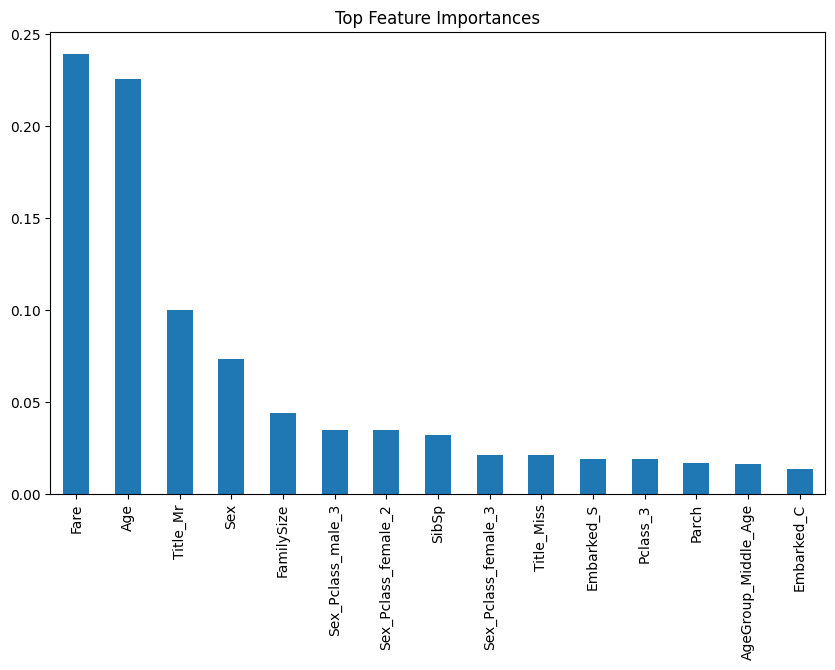

In [930]:
from sklearn.ensemble import RandomForestClassifier

# Fit on engineered dataset
model = RandomForestClassifier(random_state=42)
model.fit(X_engineered, y)

# Get feature importance
importances = pd.Series(model.feature_importances_, index=X_engineered.columns)
importances = importances.sort_values(ascending=False)

print(importances)

# Plot for better view
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
importances.head(15).plot(kind='bar')
plt.title("Top Feature Importances")
plt.show()


<h1>Select High and Moderate features</h1>

In [931]:
selected_features = [
    'Fare', 'Age', 'Sex', 'FamilySize', 'SibSp', 'Parch',
    'Embarked_C', 'Embarked_S', 
    'Title_Mr', 'Title_Miss', 'Title_Mrs',
    'Sex_Pclass_male_3', 'Sex_Pclass_female_2', 'Sex_Pclass_female_3',
    'Pclass_3', 'AgeGroup_Middle_Age', 'Sex_Pclass_male_2'
]

X_engineered = X_engineered[selected_features]


<h1>Again compare original and engineered features</h1>

In [932]:

# Cleaned X_engineered with redundant features removed
# X_engineered = pd.get_dummies(df[['Pclass','Age', 'Sex', 'SibSp', 'Parch', 'Fare',
#                    'Embarked_C', 'Embarked_S',
#                    'FamilySize', 'IsAlone',
#                    'Title', 'AgeGroup', 'Sex_Pclass']], drop_first=True)

# Run cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

original_score = cross_val_score(RandomForestClassifier(), X_original, y, cv=5).mean()
engineered_score = cross_val_score(RandomForestClassifier(), X_engineered, y, cv=5).mean()

print(f"Original score: {original_score:.4f}")
print(f"Engineered score: {engineered_score:.4f}")
print(f"Improvement: {(engineered_score - original_score) * 100:.2f}%")


Original score: 0.8155
Engineered score: 0.8103
Improvement: -0.52%


<h1 style="color:blue">Comprehensive Titanic Feature Engineering Pipeline</h1>

Check a separate file called apply_feature_engineering.ipynb

In [933]:
X_engineered.columns

Index(['Fare', 'Age', 'Sex', 'FamilySize', 'SibSp', 'Parch', 'Embarked_C',
       'Embarked_S', 'Title_Mr', 'Title_Miss', 'Title_Mrs',
       'Sex_Pclass_male_3', 'Sex_Pclass_female_2', 'Sex_Pclass_female_3',
       'Pclass_3', 'AgeGroup_Middle_Age', 'Sex_Pclass_male_2'],
      dtype='object')

In [934]:
y

0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 775, dtype: int64

<h1>Dataset Splitting</h1>

<h1> Train-Test Split</h1>

In [935]:
from sklearn.model_selection import train_test_split

# Basic train-test split
X = X_engineered
y = y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,      # For reproducibility
    stratify=y            # Maintain class distribution
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Training survival rate: {y_train.mean():.3f}")
print(f"Test survival rate: {y_test.mean():.3f}")

Training set: 620 samples (80.0%)
Test set: 155 samples (20.0%)
Training survival rate: 0.339
Test survival rate: 0.342


<h1>Train-Validation-Test Split</h1>

In [936]:
# Three-way split
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp  # 0.25 * 0.8 = 0.2
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Verify class distribution
print("\nClass distribution:")
print(f"Training: {y_train.mean():.3f}")
print(f"Validation: {y_val.mean():.3f}")
print(f"Test: {y_test.mean():.3f}")

Training set: 465 samples (60.0%)
Validation set: 155 samples (20.0%)
Test set: 155 samples (20.0%)

Class distribution:
Training: 0.340
Validation: 0.335
Test: 0.342


<h1>Stratified Splitting</h1>

In [937]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified split ensuring balanced representation
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(sss.split(X, y))

X_train_strat, X_test_strat = X.iloc[train_idx], X.iloc[test_idx]
y_train_strat, y_test_strat = y.iloc[train_idx], y.iloc[test_idx]

print("Stratified Split Results:")
print(f"Original survival rate: {y.mean():.3f}")
print(f"Training survival rate: {y_train_strat.mean():.3f}")
print(f"Test survival rate: {y_test_strat.mean():.3f}")

Stratified Split Results:
Original survival rate: 0.339
Training survival rate: 0.339
Test survival rate: 0.342


<h1>Cross-Validation Splits</h1>

In [938]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# K-Fold Cross Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Example with Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=kfold, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-validation scores: [0.78064516 0.76774194 0.81935484 0.79354839 0.83225806]
Mean CV score: 0.7987 (+/- 0.0479)


<h1>Maintain Data Leakage Prevention</h1>

In [948]:
# WRONG: Scaling before splitting (data leakage)
# X_scaled = StandardScaler().fit_transform(X)
# X_train, X_test = train_test_split(X_scaled, y, test_size=0.2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train only
X_test_scaled = scaler.transform(X_test)        # Transform test using train stats 
print(X_train_scaled)
print(X_test_scaled)

[[-0.3516799   1.08621334  0.67736514 ... -1.31122014  1.89541357
   2.6360421 ]
 [-1.30401175  0.69933856  0.67736514 ... -1.31122014  1.89541357
  -0.37935661]
 [-1.30401175  0.08033892  0.67736514 ... -1.31122014 -0.52758934
   2.6360421 ]
 ...
 [-0.77473501 -0.30653586  0.67736514 ...  0.76264845 -0.52758934
  -0.37935661]
 [-0.7234556  -0.53866073  0.67736514 ...  0.76264845 -0.52758934
  -0.37935661]
 [-0.73444405  0.38983874  0.67736514 ...  0.76264845 -0.52758934
  -0.37935661]]
[[ 2.83466133 -0.30653586  0.67736514 ...  0.76264845 -0.52758934
  -0.37935661]
 [ 0.45413937  0.15771387  0.67736514 ... -1.31122014 -0.52758934
   2.6360421 ]
 [ 1.29658678  1.31833821  0.67736514 ... -1.31122014  1.89541357
  -0.37935661]
 ...
 [-0.78724718 -0.84816055  0.67736514 ...  0.76264845 -0.52758934
  -0.37935661]
 [-0.321154   -1.85403498 -1.47630863 ...  0.76264845 -0.52758934
  -0.37935661]
 [-0.68438802 -0.30653586  0.67736514 ...  0.76264845 -0.52758934
  -0.37935661]]
